In [4]:
%%bash
IFS=$'\n'
for i in `find /home/amir/ -iname "*.csv"`; do 
    bash m.sh "$i" >> az_2
done

In [5]:
import pandas as pd
l = [i.strip() for i in open("az_2", 'r').read().split(">>>>>>>>>>>>>>> ")]
rows_to_consider = [i.count("\n") == 2 for i in l]
l = pd.DataFrame(pd.Series(l).loc[rows_to_consider].str.split("\n").to_list())

ind_to_drop = l[2].str.strip("Python: ").str.len().where(lambda x:x==0).dropna().index.to_list()
l.drop(ind_to_drop, inplace=True)
l[1] = l[1].str.strip("Python: ").astype(int)


ind_to_drop = l[2].str.strip("R:      ").str.len().where(lambda x:x==0).dropna().index.to_list()
l.drop(ind_to_drop, inplace=True)
l[2] = l[2].str.strip("R:      ").astype(int)


l.columns = ['File', 'Python', 'R']


l['Python/R'] = l.Python / l.R

df = l.copy()

<AxesSubplot:>

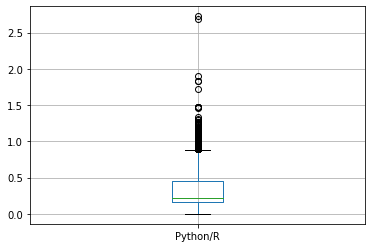

In [8]:
df['Python/R'].plot(kind='box', grid=True)

<AxesSubplot:ylabel='Frequency'>

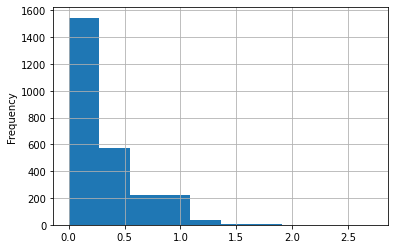

In [9]:
df['Python/R'].plot(kind='hist', grid=True)